In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_location = "properati.csv"

data = pd.read_csv(data_location)
data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [3]:
data.shape

(121220, 26)

In [4]:
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [5]:
data2 = data.loc[:, ['price','currency','price_aprox_local_currency', 'price_aprox_usd']]
data2

,price,currency,price_aprox_local_currency,price_aprox_usd
0,62000.0,USD,1093959.00,62000.0
1,150000.0,USD,2646675.00,150000.0
2,72000.0,USD,1270404.00,72000.0
3,95000.0,USD,1676227.50,95000.0
4,64000.0,USD,1129248.00,64000.0
...,...,...,...,...
121215,870000.0,USD,15350715.00,870000.0
121216,498000.0,USD,8786961.00,498000.0
121217,131500.0,USD,2320251.75,131500.0
121218,95900.0,USD,1692107.55,95900.0


In [6]:
data.isnull().sum() / data.shape[0] * 100

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [7]:
data.state_name.value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

In [8]:
data.property_type.value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [9]:
## VAMOS A ANALIZAR LA VARIABLE 'SUP. CUBIERTA' SEGUN EL 'TIPO DE PROPIEDAD', 
## ELEGIMOS SUP. CUBIERTA PORQUE SOLO TIENE EL 16% DE NULOS

data.groupby('property_type')['surface_covered_in_m2'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4913.0,88.0,139.0,1.0,51.0,73.0,104.0,6610.0
apartment,59735.0,74.0,805.0,0.0,40.0,52.0,76.0,187000.0
house,33510.0,218.0,420.0,1.0,120.0,180.0,260.0,38240.0
store,3155.0,420.0,1563.0,1.0,42.0,120.0,300.0,35000.0


C:\Users\nacho\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='property_type', ylabel='surface_covered_in_m2'>

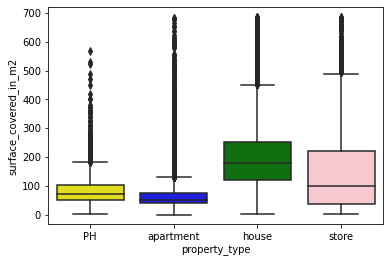

In [10]:
## HACEMOS UN BOXPLOT PARA VER SI HAY OUTLIER

mask_sup_cub = data.surface_covered_in_m2.apply(lambda x: x <= 687)

palette_property_type = ["yellow", "blue", "green", "pink"]

sns.boxplot(data.property_type, data.surface_covered_in_m2[mask_sup_cub], palette = palette_property_type)

In [11]:
## CALCULOS DE LOS OUTLIER DE 'SUP. CUBIERTA' SEGUN EL 'TIPO DE PROPIEDAD'

q1 = data.groupby('property_type')['surface_covered_in_m2'].quantile(0.25)
q3 = data.groupby('property_type')['surface_covered_in_m2'].quantile(0.75)

iqr = (q3 - q1) * 1.5

PH_sup_cub_up_threshold = q3['PH'] + iqr['PH']

apartment_sup_cub_up_threshold = q3['apartment'] + iqr['apartment']

house_sup_cub_up_threshold = q3['house'] + iqr['house']

store_sup_cub_up_threshold = q3['store'] + iqr['store']

print('Outilers de Sup. Cubierta')
print('PH > ', PH_sup_cub_up_threshold, 'm2')
print('apartment > ', apartment_sup_cub_up_threshold, 'm2')
print('house > ', house_sup_cub_up_threshold, 'm2')
print('store > ', store_sup_cub_up_threshold, 'm2')

Outilers de Sup. Cubierta
PH >  183.5 m2
apartment >  130.0 m2
house >  470.0 m2
store >  687.0 m2


In [12]:
## VAMOS A ANALIZAR LA VARIABLE 'PRECIO APROX EN USD' SEGUN EL 'TIPO DE PROPIEDAD'
## ELEGIMOS PRECIO APROX EN USD PORQUE SOLO TIENE EL 16% DE NULOS

data.groupby('property_type')['price_aprox_usd'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,5220.0,147689.0,148895.0,5048.0,85000.0,120000.0,165000.0,2800000.0
apartment,59616.0,187407.0,316218.0,4667.0,80000.0,119000.0,190000.0,46545445.0
house,32715.0,329697.0,458209.0,0.0,140000.0,240000.0,384450.0,25000000.0
store,3259.0,440257.0,761394.0,4952.0,95000.0,210000.0,450000.0,13000000.0


C:\Users\nacho\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='property_type', ylabel='price_aprox_usd'>

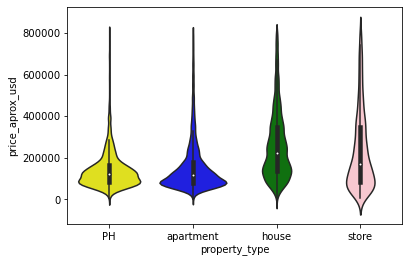

In [13]:
## HACEMOS UN BOXPLOT PARA VER SI HAY OUTLIER

mask_price_usd = data.price_aprox_usd.apply(lambda x: x <= 800000)

sns.violinplot(data.property_type, data.price_aprox_usd[mask_price_usd], palette = palette_property_type)

In [14]:
## CALCULOS DE LOS OUTLIER DE 'PRECIO APROX EN USD' SEGUN EL 'TIPO DE PROPIEDAD'

q1 = data.groupby('property_type')['price_aprox_usd'].quantile(0.25)
q3 = data.groupby('property_type')['price_aprox_usd'].quantile(0.75)

iqr = (q3 - q1) * 1.5

PH_price_usd_up_threshold = q3['PH'] + iqr['PH']

apartment_price_usd_up_threshold = q3['apartment'] + iqr['apartment']

house_sup_price_usd_threshold = q3['house'] + iqr['house']

store_sup_price_usd_threshold = q3['store'] + iqr['store']

print('Outilers de Price Aprox en USD')
print('PH > ', PH_price_usd_up_threshold, 'USD')
print('apartment > ', apartment_price_usd_up_threshold, 'USD')
print('house > ', house_sup_price_usd_threshold, 'USD')
print('store > ', store_sup_price_usd_threshold, 'USD')

Outilers de Price Aprox en USD
PH >  285000.0 USD
apartment >  355000.0 USD
house >  751125.0 USD
store >  982500.0 USD


In [15]:
## VAMOS A ANALIZAR LA VARIABLE 'SUP. CUBIERTA' SEGUN EL 'TIPO DE PROPIEDAD', 
## ELEGIMOS SUP. CUBIERTA PORQUE SOLO TIENE EL 16% DE NULOS

data.groupby('property_type')['surface_total_in_m2'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3601.0,122.0,298.0,0.0,61.0,90.0,141.0,14742.0
apartment,51085.0,97.0,1603.0,0.0,43.0,59.0,87.0,200000.0
house,24505.0,507.0,2136.0,0.0,180.0,278.0,475.0,154438.0
store,2701.0,495.0,2261.0,0.0,60.0,154.0,360.0,93000.0


C:\Users\nacho\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='property_type', ylabel='surface_total_in_m2'>

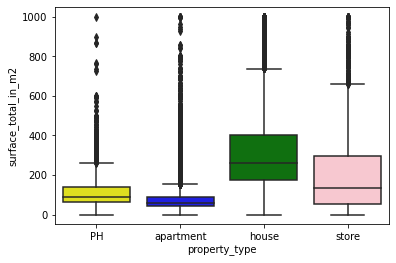

In [16]:
## HACEMOS UN BOXPLOT PARA VER SI HAY OUTLIER

mask_sup_total = data.surface_total_in_m2.apply(lambda x: x <= 1000)

sns.boxplot(data.property_type, data.surface_total_in_m2[mask_sup_total], palette = palette_property_type)

In [17]:
## CALCULOS DE LOS OUTLIER DE 'SUP. TOTAL' SEGUN EL 'TIPO DE PROPIEDAD'

q1 = data.groupby('property_type')['surface_total_in_m2'].quantile(0.25)
q3 = data.groupby('property_type')['surface_total_in_m2'].quantile(0.75)

iqr = (q3 - q1) * 1.5

PH_sup_total_up_threshold = q3['PH'] + iqr['PH']

apartment_sup_total_up_threshold = q3['apartment'] + iqr['apartment']

house_sup_total_up_threshold = q3['house'] + iqr['house']

store_sup_total_up_threshold = q3['store'] + iqr['store']

print('Outilers de Sup. Cubierta')
print('PH > ', PH_sup_total_up_threshold, 'm2')
print('apartment > ', apartment_sup_total_up_threshold, 'm2')
print('house > ', house_sup_total_up_threshold, 'm2')
print('store > ', store_sup_total_up_threshold, 'm2')

Outilers de Sup. Cubierta
PH >  261.0 m2
apartment >  153.0 m2
house >  917.5 m2
store >  810.0 m2


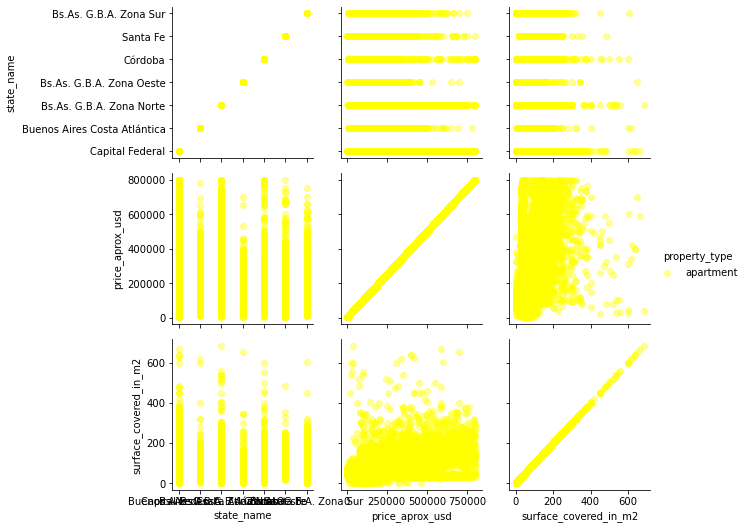

In [18]:
## VAMOS A ANALIZAR SI HAY CORRELACION ENTRE LAS VARIABLES 'ESTADO','PRECIO APROX EN USD; Y ;SUP. CUBIERTA'
## NOS QUEDAMOS CON LOS 7 PRINCIPALES ESTADOS QUE ACUMULAN EL 85% DE LAS PROPIEDADES EN ARGENTINA

state_values = ['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Córdoba', 'Santa Fe','Buenos Aires Costa Atlántica', 'Bs.As. G.B.A. Zona Oeste']

mask_state = data.state_name.apply(lambda x: x in state_values)
mask_property_type = data.property_type == 'apartment'
mask_state_sup_price = mask_state & mask_sup_cub & mask_price_usd & mask_property_type

data_mask = data.loc[mask_state_sup_price, :]


g = sns.PairGrid(data_mask, vars=['state_name','price_aprox_usd', 'surface_covered_in_m2'],hue='property_type', palette=palette_property_type)
                
g.map(plt.scatter, alpha=0.4)
g.add_legend()

In [19]:
## VAMOS A COMPLETAR LA COLUMNA 'SUP. CUBIERTA', SON  INICIALMENTE 19907 NULOS
## 1) COMPLETAMOS LOS NULOS CON LA MEDIANA DEL GRUPO TIPO DE PROPIEDAD-ESTADO Y NOS QUEDARON 71 NULOS
## 2) COMPLETAMOS LOS 71 NULOS RESTANTES CON LA MEDIANA DEL GRUPO TIPO DE PROPIEDAD

data['surface_cub_completa'] = data.groupby(['property_type', 'state_name'])['surface_covered_in_m2'].transform(lambda grp: grp.fillna(grp.median()))

data['surface_cub_completa'] = data.groupby('property_type')['surface_cub_completa'].transform(lambda grp: grp.fillna(grp.median()))

print('Cantidad de Nulos inicialmente:', data.surface_covered_in_m2.isnull().sum())
print('Cantidad de Nulos luego de completar:', data.surface_cub_completa.isnull().sum())

data[['property_type', 'state_name', 'surface_covered_in_m2', 'surface_cub_completa']].sample(10)

Cantidad de Nulos inicialmente: 19907
Cantidad de Nulos luego de completar: 0


,property_type,state_name,surface_covered_in_m2,surface_cub_completa
84240,apartment,Capital Federal,31.0,31.0
82260,house,Bs.As. G.B.A. Zona Norte,200.0,200.0
45669,apartment,Capital Federal,178.0,178.0
13806,PH,Bs.As. G.B.A. Zona Oeste,182.0,182.0
62755,house,Capital Federal,120.0,120.0
9462,apartment,Capital Federal,NaN,50.0
36460,apartment,Buenos Aires Costa Atlántica,NaN,52.0
72624,apartment,Bs.As. G.B.A. Zona Sur,45.0,45.0
114387,apartment,Capital Federal,119.0,119.0
15047,house,Bs.As. G.B.A. Zona Norte,174.0,174.0


In [20]:
## VAMOS A COMPLETAR LA COLUMNA 'SUP. TOTAL', SON INICIALMENTE 39328 NULOS
## 1) COMPLETAMOS LOS NULOS CON LA MEDIANA DEL GRUPO TIPO DE PROPIEDAD-ESTADO Y NOS QUEDARON 19 NULOS
## 2) LUEGO CONFIRMAMOS QUE LA 'SUP TOTAL' SEA MAYOR O IGUAL A LA 'SUP. CUBIERTA'

data['surface_total_completa'] = data.groupby(['property_type', 'state_name'])['surface_total_in_m2'].transform(lambda grp: grp.fillna(grp.median()))

data['surface_total_completa'] = data.apply(lambda x: x['surface_total_completa'] if x['surface_total_completa'] >= x['surface_cub_completa'] else x['surface_cub_completa'], axis=1)

print('Cantidad de Nulos inicialmente:', data.surface_total_in_m2.isnull().sum())
print('Cantidad de Nulos luego de completar:', data.surface_total_completa.isnull().sum())

data[['property_type', 'state_name', 'surface_covered_in_m2', 'surface_cub_completa', 'surface_total_in_m2', 'surface_total_completa']].sample(10)

Cantidad de Nulos inicialmente: 39328
Cantidad de Nulos luego de completar: 0


,property_type,state_name,surface_covered_in_m2,surface_cub_completa,surface_total_in_m2,surface_total_completa
46224,apartment,Bs.As. G.B.A. Zona Norte,54.0,54.0,59.0,59.0
44261,house,Bs.As. G.B.A. Zona Norte,NaN,209.0,533.0,533.0
103833,apartment,Bs.As. G.B.A. Zona Sur,45.0,45.0,NaN,60.0
105235,apartment,Capital Federal,NaN,50.0,35.0,50.0
64566,apartment,Córdoba,42.0,42.0,NaN,59.0
19827,apartment,Capital Federal,NaN,50.0,NaN,56.0
43128,apartment,Bs.As. G.B.A. Zona Norte,95.0,95.0,95.0,95.0
119434,apartment,Capital Federal,75.0,75.0,83.0,83.0
89464,house,Bs.As. G.B.A. Zona Sur,142.0,142.0,194.0,194.0
94375,house,Bs.As. G.B.A. Zona Sur,140.0,140.0,580.0,580.0


In [21]:
## VAMOS A COMPLETAR LA COLUMNA 'PRECIO APROX EN USD', SON  INICIALMENTE 20410 NULOS
## 1) COMPLETAMOS LOS NULOS CON LA MEDIANA DEL GRUPO 'TIPO DE PROPIEDAD-ESTADO-SUP TOTAL-SUP CUBIERTA' Y NOS QUEDARON 5708 NULOS
## 2) COMPLETAMOS LOS 5708 NULOS RESTANTES CON LA MEDIANA DEL GRUPO TIPO DE PROPIEDAD

data['price_usd_completa'] = data.groupby(['property_type', 'state_name','surface_cub_completa', 'surface_total_completa'])['price_aprox_usd'].transform(lambda grp: grp.fillna(grp.median()))

data['price_usd_completa'] = data.groupby('property_type')['price_usd_completa'].transform(lambda grp: grp.fillna(grp.median()))

print('Cantidad de Nulos inicialmente:', data.price_aprox_usd.isnull().sum())
print('Cantidad de Nulos luego de completar:', data.price_usd_completa.isnull().sum())

data[['property_type', 'state_name', 'price_aprox_usd', 'price_usd_completa']].sample(10)

Cantidad de Nulos inicialmente: 20410
Cantidad de Nulos luego de completar: 0


,property_type,state_name,price_aprox_usd,price_usd_completa
81311,house,Tucumán,NaN,220000.00
115130,apartment,Córdoba,52157.81,52157.81
72561,apartment,Capital Federal,465000.00,465000.00
72055,apartment,Bs.As. G.B.A. Zona Sur,122917.00,122917.00
63514,apartment,Buenos Aires Costa Atlántica,79900.00,79900.00
4689,apartment,Buenos Aires Costa Atlántica,69500.00,69500.00
28548,apartment,Capital Federal,149000.00,149000.00
83308,apartment,Córdoba,78517.14,78517.14
92567,apartment,Bs.As. G.B.A. Zona Norte,93000.00,93000.00
19091,house,Buenos Aires Interior,110000.00,110000.00


In [22]:
data.shape

(121220, 29)

In [23]:
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
surface_cub_

In [24]:
data.isnull().sum() / data.shape[0] * 100

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [25]:
data.groupby('property_type')['price_aprox_usd'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,5220.0,147689.0,148895.0,5048.0,85000.0,120000.0,165000.0,2800000.0
apartment,59616.0,187407.0,316218.0,4667.0,80000.0,119000.0,190000.0,46545445.0
house,32715.0,329697.0,458209.0,0.0,140000.0,240000.0,384450.0,25000000.0
store,3259.0,440257.0,761394.0,4952.0,95000.0,210000.0,450000.0,13000000.0


In [26]:
data.groupby('property_type')['price_usd_completa'].describe().round(0)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,5751.0,145166.0,143396.0,5048.0,86000.0,120000.0,160000.0,2800000.0
apartment,71065.0,178093.0,294547.0,4667.0,80760.0,115000.0,180000.0,46545445.0
house,40268.0,309499.0,423899.0,0.0,140000.0,220000.0,350000.0,25000000.0
store,4136.0,391079.0,688857.0,4952.0,103750.0,190000.0,385000.0,13000000.0


In [27]:
# CREAMOS UNA ETIQUETA PARA CADA UNA DE LAS FILAS DEL DATASET ORIGINAL

import numpy as np
data['tag']=np.arange(len(data))
data.head(5)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,rooms,expenses,properati_url,description,title,image_thumbnail,surface_cub_completa,surface_total_completa,price_usd_completa,tag
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,40.0,55.0,62000.0,0
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,54.0,60.0,150000.0,1
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,55.0,55.0,72000.0,2
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,76.0,105.0,95000.0,3
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,35.0,35.0,64000.0,4


In [28]:
#Vamos a revisar la descripción de los inmuebles para ver qué información podemos extraer que contribuya al valor de la prop.
data[['description','title']]


,description,title
0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...
...,...,...
121215,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes
121216,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...
121217,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...
121218,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...


In [29]:
#Utilizamos la columna descripción y no la de title porque la primera tiene más info
#Ahora vamos a buscar en la descripción si el inmueble tiene 'pileta' con una expresión regular
import re
pileta_pattern='pileta|piscina|pile|PILETA|PISCINA|PILE'
pileta_regex=re.compile(pileta_pattern)


In [30]:
#Convierto todos los valores de la columna description a str (si no me saltaba un error al aplicar la regex)
data['description']=data['description'].apply(str)


In [31]:
#Usamos la función search porque queremos encontrar la primer coincidencia con el patrón
pileta_matches_mask=data.description.apply(lambda x: pileta_regex.search(x))


In [32]:
#Aplico una máscara que tiene como True los valores que contienen la palabra 'pileta'
pileta_matches=data.description.loc[pileta_matches_mask.notnull()]
pileta_matches


7         EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...
8         EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPER...
23        Hermoso departamento, ubicado en la calle Almi...
30        Muy linda casa , toda en planta baja, doble pa...
36        Casa en Pilar centro ,a pocas cuadras de la pl...
                                ...                        
121211    Excelente departamento de categoría con vistas...
121212    ESPECTACULAR CASA ESTILO RACIONALISTA EN CALLE...
121213    EXCELENTE casa en Martinez. Inmejorable ubicai...
121215    TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...
121216    Excelente e impecable casa en Venta en Las Lom...
Name: description, Length: 24293, dtype: object

In [33]:
#Vamos a hacer una nueva columna que diga simplemente 1 para las filas cuya descripción contiene esa palabra
data['pileta']=pileta_matches.apply(lambda x: 0 if x is np.NaN else 1)


In [34]:
#vemos los datos de la fila 23 que corresponde a una propiedad con pileta
data.iloc[23]


Unnamed: 0                                                                   23
operation                                                                  sell
property_type                                                         apartment
place_name                                                                Pilar
place_with_parent_names        |Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|
country_name                                                          Argentina
state_name                                             Bs.As. G.B.A. Zona Norte
geonames_id                                                                 NaN
lat-lon                                                                     NaN
lat                                                                         NaN
lon                                                                         NaN
price                                                              82000.000000
currency                                

In [35]:
#Ahora vamos a buscar en la descripción si el inmueble tiene 'garage' con una expresión regular
garage_pattern='garage|cochera|GARAGE|COCHERA'
garage_regex=re.compile(garage_pattern)


In [36]:
#Usamos la función search porque queremos encontrar la primer coincidencia con el patrón
garage_matches_mask=data.description.apply(lambda x: garage_regex.search(x))


In [37]:
#Aplico una máscara que tiene como True los valores que contienen la palabra 'garage'
garage_matches=data.description.loc[garage_matches_mask.notnull()]
garage_matches


1         Venta de departamento en décimo piso al frente...
10        Hermosa casa sin terminar de 3 dormitorios, ba...
15        ULTIMA UNIDAD DISPONIBLEHAUS BOULEVARD: Metros...
23        Hermoso departamento, ubicado en la calle Almi...
24        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORIA...
                                ...                        
121146    VENTA PISO CON COCHERA EN PALERMOMuy buena ubi...
121149    Casa en tres plantas con cochera para dos auto...
121211    Excelente departamento de categoría con vistas...
121215    TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...
121217    VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...
Name: description, Length: 36114, dtype: object

In [38]:
#Análogamente a la columna 'pileta', creamos una columna 'garage'
data['garage']=garage_matches.apply(lambda x: 0 if x is np.NaN else 1)


In [39]:
#vemos los datos de la fila 23 que corresponde a una propiedad con pileta
data.iloc[76]


Unnamed: 0                                                                   76
operation                                                                  sell
property_type                                                             house
place_name                                                        Mar del Plata
place_with_parent_names       |Argentina|Buenos Aires Costa Atlántica|Mar de...
country_name                                                          Argentina
state_name                                         Buenos Aires Costa Atlántica
geonames_id                                                      3430863.000000
lat-lon                                           -38.0166859908,-57.5332979703
lat                                                                  -38.016686
lon                                                                  -57.533298
price                                                                       NaN
currency                                

In [40]:
#Ahora vamos a buscar en la descripción si el inmueble tiene 'terraza' con una expresión regular
terraza_pattern='terraza|balcón terraza|TERRAZA|BALCÓN TERRAZA'
terraza_regex=re.compile(terraza_pattern)


In [41]:
#Usamos la función search porque queremos encontrar la primer coincidencia con el patrón
terraza_matches_mask=data.description.apply(lambda x: terraza_regex.search(x))


In [42]:
#Aplico una máscara que tiene como True los valores que contienen la palabra 'terraza'
terraza_matches=data.description.loc[terraza_matches_mask.notnull()]
terraza_matches


12        EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...
13         Torre I Mondrian. 3 ambientes con terraza y d...
17        Excelente 3 ambientes en un 6 piso y con terra...
19        Excelente semipiso al contra frente en Bulnes ...
24        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORIA...
                                ...                        
121208    Puertos- Barrio Vistas - L. 88Casa en venta so...
121211    Excelente departamento de categoría con vistas...
121212    ESPECTACULAR CASA ESTILO RACIONALISTA EN CALLE...
121213    EXCELENTE casa en Martinez. Inmejorable ubicai...
121215    TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...
Name: description, Length: 23407, dtype: object

In [43]:
#Análogamente a la columna 'pileta', creamos una columna 'terraza'
data['terraza']=terraza_matches.apply(lambda x: 0 if x is np.NaN else 1)
#vemos los datos de la fila 13 que corresponde a una propiedad con terraza
data.iloc[13]


Unnamed: 0                                                                   13
operation                                                                  sell
property_type                                                         apartment
place_name                                                         Palermo Soho
place_with_parent_names        |Argentina|Capital Federal|Palermo|Palermo Soho|
country_name                                                          Argentina
state_name                                                      Capital Federal
geonames_id                                                      3430234.000000
lat-lon                                                                     NaN
lat                                                                         NaN
lon                                                                         NaN
price                                                             111700.000000
currency                                

In [56]:

# Convertir coordenadas de Properati a escala Mercator

def wgs84_to_web_mercator(df, lon="lon", lat="lat"):

    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

df = data
wgs84_to_web_mercator(df)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_cub_completa,surface_total_completa,price_usd_completa,tag,pileta,garage,terraza,price_per_m2_completa,x,y
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,55.0,62000.0,0,NaN,NaN,NaN,1127.272727,-6.513174e+06,-4.118019e+06
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,54.0,60.0,150000.0,1,NaN,1.0,NaN,2500.000000,-6.452560e+06,-4.150827e+06
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,55.0,72000.0,2,NaN,NaN,NaN,1309.090909,-6.514749e+06,-4.116725e+06
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,76.0,105.0,95000.0,3,NaN,NaN,NaN,904.761905,-6.514019e+06,-4.116121e+06
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,35.0,64000.0,4,NaN,NaN,NaN,1828.571429,-6.406375e+06,-4.579797e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,93.0,113.0,870000.0,121215,1.0,1.0,1.0,7699.115044,NaN,NaN
121216,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,360.0,360.0,498000.0,121216,1.0,NaN,NaN,1383.333333,NaN,NaN
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,39.0,46.0,131500.0,121217,NaN,1.0,NaN,2858.695652,-6.509474e+06,-4.105685e+06
121218,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,48.0,48.0,95900.0,121218,NaN,NaN,NaN,1997.916667,NaN,NaN


In [57]:
data['price_per_m2_completa'] = data['price_usd_completa']/data['surface_total_completa']
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_cub_completa,surface_total_completa,price_usd_completa,tag,pileta,garage,terraza,price_per_m2_completa,x,y
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,55.0,62000.0,0,NaN,NaN,NaN,1127.272727,-6.513174e+06,-4.118019e+06
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,54.0,60.0,150000.0,1,NaN,1.0,NaN,2500.000000,-6.452560e+06,-4.150827e+06
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,55.0,72000.0,2,NaN,NaN,NaN,1309.090909,-6.514749e+06,-4.116725e+06
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,76.0,105.0,95000.0,3,NaN,NaN,NaN,904.761905,-6.514019e+06,-4.116121e+06
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,35.0,64000.0,4,NaN,NaN,NaN,1828.571429,-6.406375e+06,-4.579797e+06


In [58]:
# Plotteo del mapa usando BOKEH. Mapa de precio por metro cuadrado según ubicación en la Argentina

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.tile_providers import CARTODBPOSITRON, get_provider, Vendors
from bokeh.io import output_notebook, show, output_file
from bokeh.palettes import PRGn, RdYlGn, Reds
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.layouts import row, column
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter

ancho = 1000000
alto = 2000000
center_lat = -34.6989
center_lon = -64.7597
x_mercator = -7209016.83
y_mercator = -4123037.77
x_rango = (x_mercator - ancho, x_mercator + ancho)
y_rango = (y_mercator - alto -1200000, y_mercator + alto -200000)



output_file("tile.html")

tile_provider = get_provider(CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(title = "Precio por metro cuadrado de propiedades en Argentina", x_range= x_rango, y_range= y_rango,
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

source = ColumnDataSource(data)


palette = Reds[9]

color_mapper = linear_cmap(field_name = 'price_per_m2_completa', palette = palette,
                           low = data['price_per_m2_completa'].min(), high = data['price_per_m2_completa'].max())

p.circle(source = source, x= 'x', y= 'y', size=10, color = color_mapper, alpha = 0.7)



show(p)
